In [1]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(palette = 'muted', color_codes = True)

import pandas as pd
import numpy as np
import glob

/Users/juanfbages/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Functions

In [2]:
def charge_off_plot_qcut(df, col, q, labels = None, mean = True, legend_loc = 1, drop_new_col = False):
    '''Returns charge-off rate plot for a set quantile split of a variable
    in the dataframe.
    
    Args:
        df: Dataframe with column to be split and a loan status column
        col: Column in which to perform the quantile split
        q: Number of quantiles (e.g. 10 breaks the range into deciles)
        labels: A dictionary with keys title, xlabel, and ylabel
        mean: Bool. Set to True if you want the mean charge-off line in the plot
        legend_loc: Location of the plot's legend
        
    Returns:
        ax: A plot of the charged-off rate by the specified column quantiles.
    '''
    
    # Create Cut
    new_col = col + '_qcut'
    df[new_col] = pd.qcut(df[col], q = q)

    # Create Charge-off frame
    df_plot = (df.loc[df['loan_status'] == 'Charged Off', new_col]
        .value_counts().sort_index()/df[new_col].value_counts().sort_index())

    # Plot and add labels
    ax = df_plot.plot(kind = 'bar', label = '')
    if labels:
        ax.set_title(labels['title'])
        ax.set_xlabel(labels['xlabel'])
        ax.set_ylabel(labels['ylabel'])

    # Add Mean Charge-off Line
    if mean:
        mean_charge_off = df.loc[df['loan_status'] == 'Charged Off', :].shape[0]/df.shape[0]
        ax.axhline(mean_charge_off, color = 'red', linestyle = 'dashed', alpha = 0.5, label = 'Mean')
        
    # Remove Variable
    if drop_new_col:
        df.drop(new_col, axis = 1, inplace = 1)
    
    # Add Legend and return Plot
    ax.legend(loc = legend_loc)
    return ax

In [3]:
def charge_off_plot_cut(df, col, bins, labels = None, mean = True, legend_loc = 1, drop_new_col = False):
    '''Returns charge-off rate plot for a set quantile split of a variable
    in the dataframe.
    
    Args:
        df: Dataframe with column to be split and a loan status column
        col: Column in which to perform the quantile split
        q: Number of quantiles (e.g. 10 breaks the range into deciles)
        labels: A dictionary with keys title, xlabel, and ylabel
        mean: Bool. Set to True if you want the mean charge-off line in the plot
        legend_loc: Location of the plot's legend
        drop_new_col: Drop newly create cut variable from df. 
        
    Returns:
        ax: A plot of the charged-off rate by the specified column quantiles.
        df[new_val]: if keep_col is set to True this variable is included in the new dataframe.
    '''
    
    # Create Cut
    new_col = col + '_cut'
    df[new_col] = pd.cut(df[col], bins = bins)

    # Create Charge-off frame
    df_plot = (df.loc[df['loan_status'] == 'Charged Off', new_col]
        .value_counts().sort_index()/df[new_col].value_counts().sort_index())

    # Plot and add labels
    ax = df_plot.plot(kind = 'bar', label = '')
    if labels:
        ax.set_title(labels['title'])
        ax.set_xlabel(labels['xlabel'])
        ax.set_ylabel(labels['ylabel'])

    # Add Mean Charge-off Line
    if mean:
        mean_charge_off = df.loc[df['loan_status'] == 'Charged Off', :].shape[0]/df.shape[0]
        ax.axhline(mean_charge_off, color = 'red', linestyle = 'dashed', alpha = 0.5, label = 'Mean')
        
    # Remove Variable
    if drop_new_col:
        df.drop(new_col, axis = 1, inplace = 1)
        
    # Add Legend and return Plot
    ax.legend(loc = legend_loc)
    return ax

# Read-in Data

In [4]:
files = glob.glob("../data/*.csv")
list_ = []

for f in files:
    # Use low_memory = False to avoid warning message for mixed type data
    tmp_df = pd.read_csv(f, header = 1, engine = 'python')
    list_.append(tmp_df)

df = pd.concat(list_, ignore_index = True)

# Exploratory Data Analysis

## Dataset Structure

In [5]:
df['loan_status'].value_counts()

Fully Paid                                             130811
Current                                                 64570
Charged Off                                             28833
Does not meet the credit policy. Status:Fully Paid       1988
Late (31-120 days)                                       1973
In Grace Period                                          1314
Does not meet the credit policy. Status:Charged Off       761
Late (16-30 days)                                         362
Default                                                    46
Name: loan_status, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230663 entries, 0 to 230662
Data columns (total 74 columns):
id                             230663 non-null object
member_id                      230658 non-null float64
loan_amnt                      230658 non-null float64
funded_amnt                    230658 non-null float64
funded_amnt_inv                230658 non-null float64
term                           230658 non-null object
int_rate                       230658 non-null object
installment                    230658 non-null float64
grade                          230658 non-null object
sub_grade                      230658 non-null object
emp_title                      216311 non-null object
emp_length                     230658 non-null object
home_ownership                 230658 non-null object
annual_inc                     230654 non-null float64
verification_status            230658 non-null object
issue_d                        230658 non-null object
loan_status        

In [7]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,230658.000000,230658.000000,230658.000000,230658.000000,230658.000000,230654.000000,230658.000000,230629.000000,230629.000000,96188.000000,...,0,0,0,0,0,0,160382.000000,0,0,0
mean,4973037.326232,13752.488966,13700.987067,13565.474715,421.416865,71666.693854,16.379008,0.223563,0.854788,34.983407,...,NaN,NaN,NaN,NaN,NaN,NaN,29894.107182,NaN,NaN,NaN
std,3608537.178254,8089.573944,8060.727753,8101.843887,241.413308,54313.347690,7.580052,0.673448,1.145318,21.744923,...,NaN,NaN,NaN,NaN,NaN,NaN,37775.038011,NaN,NaN,NaN
min,70473.000000,500.000000,500.000000,0.000000,15.670000,1896.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,1538195.750000,7500.000000,7500.000000,7300.000000,244.930000,45000.000000,10.710000,0.000000,0.000000,17.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,13900.000000,NaN,NaN,NaN
50%,4368368.000000,12000.000000,12000.000000,12000.000000,374.330000,61000.000000,16.130000,0.000000,0.000000,32.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,23000.000000,NaN,NaN,NaN
75%,8176967.000000,19125.000000,19000.000000,18850.000000,552.670000,85500.000000,21.810000,0.000000,1.000000,50.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,37200.000000,NaN,NaN,NaN
max,12096968.000000,35000.000000,35000.000000,35000.000000,1408.130000,7141778.000000,34.990000,29.000000,33.000000,156.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9999999.000000,NaN,NaN,NaN


In [8]:
# Restrict dataset to Charged Off and Fully Paid observations
df = df.loc[(df['loan_status'] == 'Charged Off') | (df['loan_status'] == 'Fully Paid'), :]

In [9]:
# Get Rid of all columns with no obs
df.dropna(axis=1,how='all', inplace = True)

In [10]:
mean_charge_off = df.loc[df['loan_status'] == 'Charged Off', :].shape[0]/df.shape[0]
print("The mean charge off is {0:.2f}%".format(mean_charge_off*100))

The mean charge off is 18.06%


In [11]:
mean_funded_amnt = df['funded_amnt'].mean()
print("The mean funded amount is {0:.2f}".format(mean_funded_amnt))

The mean funded amount is 13070.66


In [12]:
mean_loss_on_charge_off = (
    df.loc[df['loan_status'] == 'Charged Off', 'funded_amnt'] -
    df.loc[df['loan_status'] == 'Charged Off', 'total_pymnt']).mean()
print("The mean loss on charged off loans is {0:.2f}".format(mean_loss_on_charge_off))

The mean loss on charged off loans is 6544.11


In [13]:
mean_gain_on_paid_loans = df.loc[df['loan_status'] == 'Fully Paid', 'total_rec_int'].mean()
print("The mean gain on paid loans is {0:.2f}".format(mean_gain_on_paid_loans))

The mean gain on paid loans is 2267.55


## Charge-off Rate

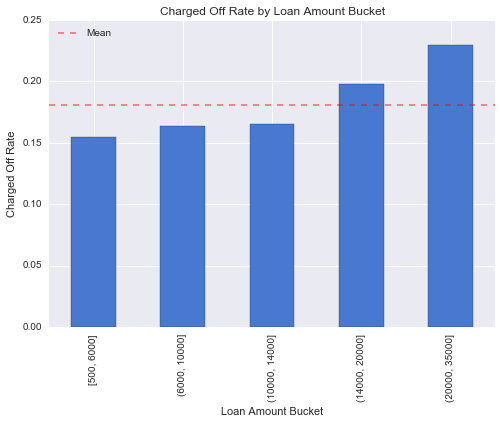

In [14]:
labels = {
    'title': 'Charged Off Rate by Loan Amount Bucket',
    'xlabel': 'Loan Amount Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_qcut(df, 'loan_amnt', q = 5, labels = labels, legend_loc = 2)

## Funded Amount

In [15]:
fund_pct = df.loc[df['loan_amnt'] == df['funded_amnt']].shape[0]/df.shape[0]*100
print('{0:.2f}% of loans are fully funded at this point in time in the dataset.'.format(fund_pct))

98.89% of loans are fully funded at this point in time in the dataset.


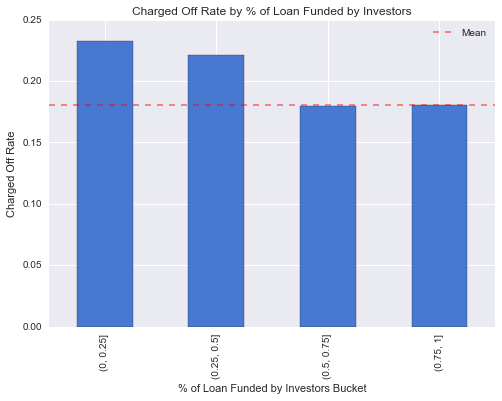

In [16]:
# Create % funded by investors column and sequence for cuts
df['inv_pct'] = df['funded_amnt_inv']/df['funded_amnt']
seq = np.linspace(0,1,5)
labels = {
    'title': 'Charged Off Rate by % of Loan Funded by Investors',
    'xlabel': '% of Loan Funded by Investors Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_cut(df, 'inv_pct', bins = seq, labels = labels, legend_loc = 1)

## Term

In [17]:
df.loc[df['loan_status'] == 'Charged Off', 'term'].value_counts()/df['term'].value_counts()

 36 months    0.148009
 60 months    0.317684
Name: term, dtype: float64

### By Loan Amount

In [18]:
(pd.crosstab(df.loc[df['loan_status'] == 'Charged Off', 'loan_amnt_qcut'],
            df.loc[df['loan_status'] == 'Charged Off', 'term'])/
 pd.crosstab(df['loan_amnt_qcut'],df['term']))

term,36 months,60 months
loan_amnt_qcut,,
"[500, 6000]",0.147264,0.283807
"(6000, 10000]",0.155410,0.288344
"(10000, 14000]",0.143253,0.295650
"(14000, 20000]",0.146673,0.318939
"(20000, 35000]",0.139392,0.333333


### By Pct of Investors Money

In [19]:
(pd.crosstab(df.loc[df['loan_status'] == 'Charged Off', 'inv_pct_cut'],
            df.loc[df['loan_status'] == 'Charged Off', 'term'])/
 pd.crosstab(df['inv_pct_cut'],df['term']))

term,36 months,60 months
inv_pct_cut,,
"(0, 0.25]",0.226207,0.533333
"(0.25, 0.5]",0.197552,0.430769
"(0.5, 0.75]",0.149596,0.467532
"(0.75, 1]",0.147267,0.316959


## Interest Rate

In [20]:
df['int_rate'] = pd.to_numeric(df['int_rate'].str.replace('%', ''), errors = 'coerce')/100

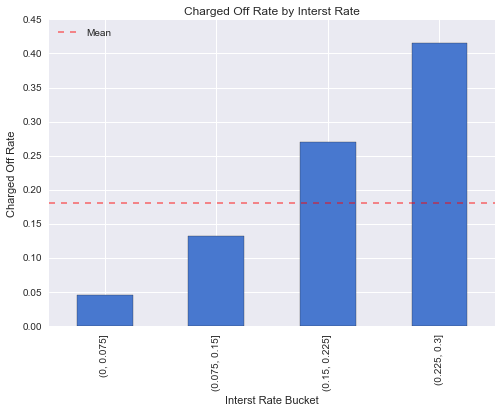

In [21]:
seq = np.linspace(0,.3,5)
labels = {
    'title': 'Charged Off Rate by Interst Rate',
    'xlabel': 'Interst Rate Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_cut(df, 'int_rate', bins = seq, labels = labels, legend_loc = 2)

## Installment

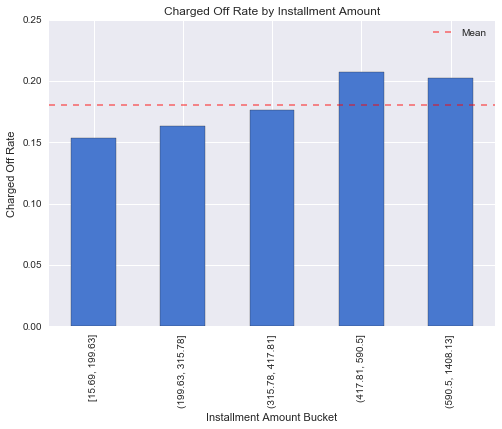

In [22]:
labels = {
    'title': 'Charged Off Rate by Installment Amount',
    'xlabel': 'Installment Amount Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_qcut(df, 'installment', q = 5, labels = labels, legend_loc = 1)

In [23]:
(pd.crosstab(df.loc[df['loan_status'] == 'Charged Off', 'installment_qcut'],
            df.loc[df['loan_status'] == 'Charged Off', 'term'])/
 pd.crosstab(df['installment_qcut'],df['term']))

term,36 months,60 months
installment_qcut,,
"[15.69, 199.63]",0.142769,0.269369
"(199.63, 315.78]",0.146641,0.277286
"(315.78, 417.81]",0.155337,0.287037
"(417.81, 590.5]",0.150281,0.334244
"(590.5, 1408.13]",0.145621,0.351327


## Grade

In [24]:
df.loc[df['loan_status'] == 'Charged Off', 'grade'].value_counts()/df['grade'].value_counts()

A    0.066195
B    0.134153
C    0.208866
D    0.267214
E    0.341272
F    0.404959
G    0.414460
Name: grade, dtype: float64

In [25]:
(pd.crosstab(df.loc[df['loan_status'] == 'Charged Off', 'inv_pct_cut'],
            df.loc[df['loan_status'] == 'Charged Off', 'grade'])/
 pd.crosstab(df['inv_pct_cut'],df['grade']))

grade,A,B,C,D,E,F,G
inv_pct_cut,,,,,,,
"(0, 0.25]",0.066667,0.219388,0.233716,0.335938,0.255814,0.235294,0.800000
"(0.25, 0.5]",0.056338,0.161458,0.216216,0.311927,0.339623,0.526316,0.500000
"(0.5, 0.75]",0.115385,0.145098,0.173333,0.180328,0.280488,0.461538,0.400000
"(0.75, 1]",0.066052,0.133576,0.208890,0.266958,0.342285,0.404751,0.411826


### Sub Grade

In [26]:
df.loc[df['loan_status'] == 'Charged Off', 'sub_grade'].value_counts()/df['sub_grade'].value_counts()

A1    0.035252
A2    0.047951
A3    0.061350
A4    0.073718
A5    0.087923
B1    0.108072
B2    0.119359
B3    0.130311
B4    0.150967
B5    0.159022
C1    0.176260
C2    0.186615
C3    0.223027
C4    0.234643
C5    0.244615
D1    0.247006
D2    0.254580
D3    0.264376
D4    0.290998
D5    0.296220
E1    0.303627
E2    0.340909
E3    0.331776
E4    0.368009
E5    0.379287
F1    0.364297
F2    0.383721
F3    0.416569
F4    0.449339
F5    0.463504
G1    0.447721
G2    0.403226
G3    0.469880
G4    0.267241
G5    0.392405
Name: sub_grade, dtype: float64

## Employment

### Title

In [27]:
df['emp_title'].fillna('Not Reported', inplace = True)
df.loc[df['emp_title'] == 'n/a', 'emp_title'] = 'Not Reported'

In [28]:
(df.loc[df['emp_title'] == 'Not Reported', 'loan_status']
    .value_counts()/df.loc[df['emp_title'] == 'Not Reported'].shape[0])

Fully Paid     0.760116
Charged Off    0.239884
Name: loan_status, dtype: float64

In [29]:
df.loc[df['emp_title'] != 'Not Reported', 'emp_title'] = 'Reported'

In [30]:
df.loc[df['loan_status'] == 'Charged Off', 'emp_title'].value_counts()/df['emp_title'].value_counts()

Reported        0.176934
Not Reported    0.239884
Name: emp_title, dtype: float64

## Length

In [31]:
df.loc[df['emp_length'] == 'n/a', 'emp_length'] = 'Not Reported'

In [32]:
df.loc[df['loan_status'] == 'Charged Off', 'emp_length'].value_counts()/df['emp_length'].value_counts()

1 year          0.169177
10+ years       0.183111
2 years         0.168738
3 years         0.173520
4 years         0.169222
5 years         0.174383
6 years         0.181809
7 years         0.188719
8 years         0.186493
9 years         0.185769
< 1 year        0.174966
Not Reported    0.252667
Name: emp_length, dtype: float64

In [33]:
df.loc[df['emp_length'] != 'Not Reported', 'emp_length'] = 'Reported'

In [34]:
df.loc[df['loan_status'] == 'Charged Off', 'emp_length'].value_counts()/df['emp_length'].value_counts()

Reported        0.177977
Not Reported    0.252667
Name: emp_length, dtype: float64

## Home Ownership

In [35]:
df.loc[df['loan_status'] == 'Charged Off', 'home_ownership'].value_counts()/df['home_ownership'].value_counts()

MORTGAGE    0.165697
NONE        0.162791
OTHER       0.191489
OWN         0.188211
RENT        0.195880
Name: home_ownership, dtype: float64

## Annual Income

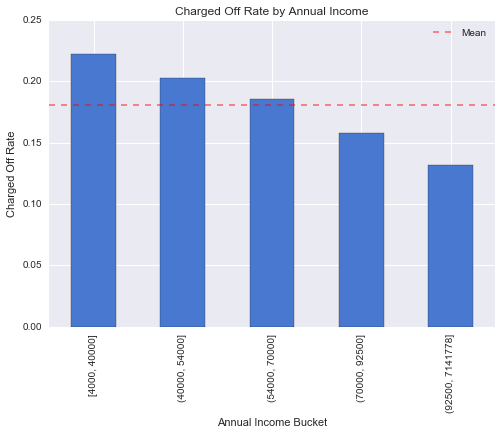

In [36]:
# Divide data into quantiles
labels = {
    'title': 'Charged Off Rate by Annual Income',
    'xlabel': 'Annual Income Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_qcut(df, 'annual_inc', q = 5, labels = labels, legend_loc = 1)

### Income Verificaiton Status

In [37]:
(df.loc[df['loan_status'] == 'Charged Off', 'verification_status']
    .value_counts()/df['verification_status'].value_counts())

Verified           0.212587
Not Verified       0.144980
Source Verified    0.180683
Name: verification_status, dtype: float64

## Month of Loan

In [38]:
df['issued_M'], df["issued_Y"] = zip(*df['issue_d'].str.split('-').tolist())

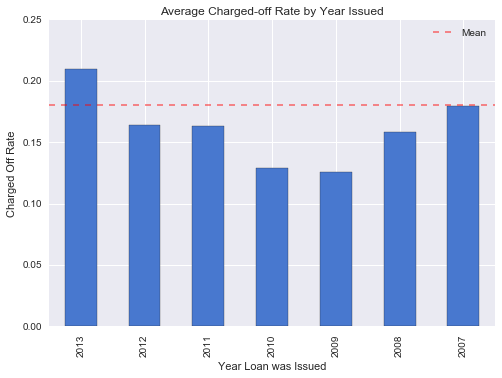

In [39]:
# Plot
(df.loc[df['loan_status'] == 'Charged Off', 'issued_Y']
    .value_counts()/df['issued_Y'].value_counts()).plot(kind = 'bar', label = '')

# Plot Settings
mean_charge_off = df.loc[df['loan_status'] == 'Charged Off', :].shape[0]/df.shape[0]
plt.title('Average Charged-off Rate by Year Issued')
plt.xlabel('Year Loan was Issued')
plt.ylabel('Charged Off Rate')
plt.axhline(mean_charge_off, color = 'red', linestyle = 'dashed', alpha = 0.5, label = 'Mean')
plt.legend()

No indication of difference in charge-off rates across months

## Payment Plan

In [40]:
df.loc[df['loan_status'] == 'Charged Off', 'pymnt_plan'].value_counts()/df['pymnt_plan'].value_counts()

n    0.18061
y        NaN
Name: pymnt_plan, dtype: float64

## Description and Purpose

In [41]:
## Do something here for Desc

### Purpose

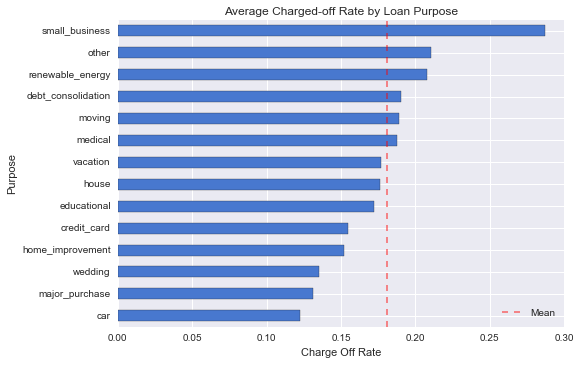

In [42]:
(df.loc[df['loan_status'] == 'Charged Off', 'purpose']
 .value_counts()/df['purpose'].value_counts()).sort_values().plot(kind = 'barh', label = '')
plt.title('Average Charged-off Rate by Loan Purpose')
plt.xlabel('Charge Off Rate')
plt.ylabel('Purpose')
plt.axvline(mean_charge_off, color = 'red', linestyle = 'dashed', alpha = 0.5, label = 'Mean')
plt.legend(loc = 4)

In [43]:
(pd.crosstab(df.loc[df['loan_status'] == 'Charged Off', 'purpose'],
            df.loc[df['loan_status'] == 'Charged Off', 'int_rate_cut'])/
 pd.crosstab(df['purpose'],df['int_rate_cut']))

int_rate_cut,"(0, 0.075]","(0.075, 0.15]","(0.15, 0.225]","(0.225, 0.3]"
purpose,,,,
car,0.039182,0.107872,0.240777,0.625000
credit_card,0.042239,0.117867,0.245277,0.375472
debt_consolidation,0.043803,0.133841,0.277545,0.432479
educational,0.000000,0.155709,0.379310,NaN
home_improvement,0.029508,0.127886,0.253682,0.310811
house,0.039683,0.129485,0.281690,0.382979
major_purchase,0.034483,0.108784,0.252261,0.549020
medical,0.041451,0.159812,0.249258,0.355932
moving,0.083969,0.153263,0.232510,0.482143


In [321]:
df.loc[(df['loan_status'] == 'Charged Off')
       &(df['purpose'] == 'car'), :].shape[0]/df.loc[df['purpose'] == 'car'].shape[0]

0.12214009151707145

## Demographics

### Zip Code

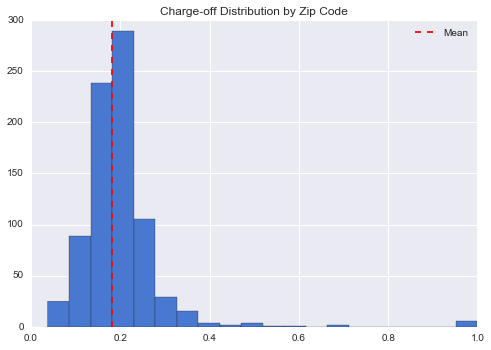

In [44]:
(df.loc[df['loan_status'] == 'Charged Off', 'zip_code'].value_counts()/df['zip_code'].value_counts()).hist(bins = 20)
plt.axvline(mean_charge_off, color = 'red', linestyle = 'dashed', label = 'Mean')
plt.title('Charge-off Distribution by Zip Code')
plt.legend()

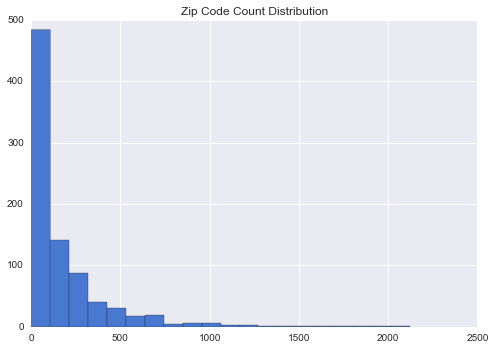

In [45]:
df['zip_code'].value_counts().hist(bins = 20)
plt.title('Zip Code Count Distribution')

### State

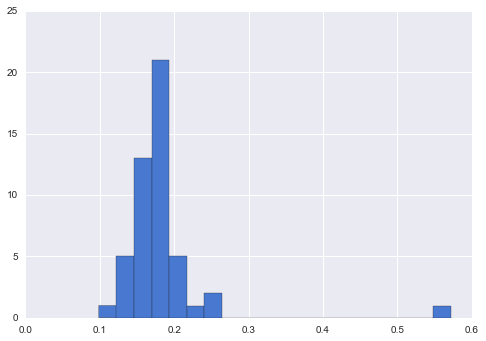

In [46]:
((df.loc[df['loan_status'] == 'Charged Off', 'addr_state']
 .value_counts()/df['addr_state'].value_counts()).hist(bins = 20))

## Debt-to-Income Ratio

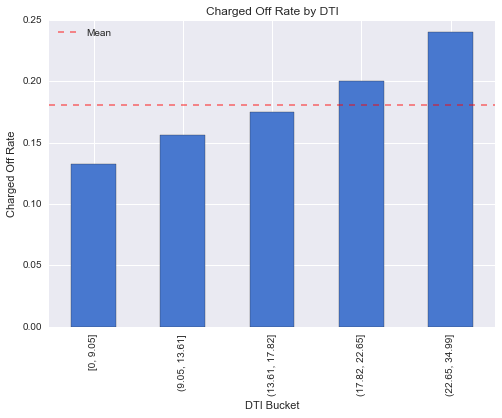

In [47]:
labels = {
    'title': 'Charged Off Rate by DTI',
    'xlabel': 'DTI Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_qcut(df, 'dti', q = 5, labels = labels, legend_loc = 2)

## Delinq 2 years

In [48]:
(df.loc[(df['delinq_2yrs'] > 0), 'loan_status']
    .value_counts()/df.loc[df['delinq_2yrs'] >0].shape[0])

Fully Paid     0.809039
Charged Off    0.190961
Name: loan_status, dtype: float64

## Earliest Credit Line

In [49]:
df['earliest_cr_line_M'], df["earliest_cr_line_Y"] = zip(*df['earliest_cr_line'].str.split('-').tolist())

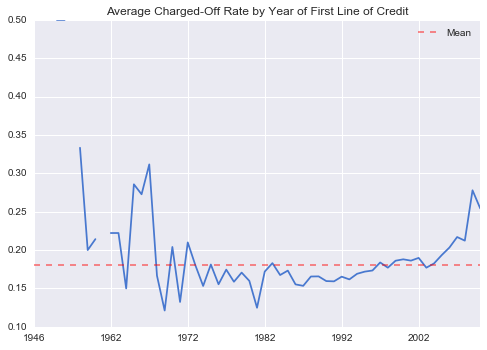

In [50]:
(df.loc[df['loan_status'] == 'Charged Off', 'earliest_cr_line_Y']
    .value_counts()/df['earliest_cr_line_Y'].value_counts()).plot(label = '')
plt.title('Average Charged-Off Rate by Year of First Line of Credit')
plt.axhline(mean_charge_off, color = 'red', label = 'Mean', linestyle = 'dashed', alpha = 0.5)
plt.legend()

## Inquiries in Last 6 months

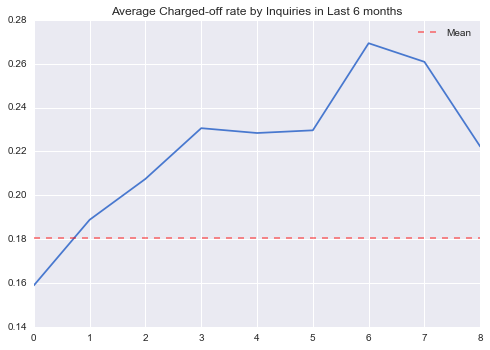

In [51]:
(df.loc[df['loan_status'] == 'Charged Off', 'inq_last_6mths']
     .value_counts()/df['inq_last_6mths'].value_counts()).plot(label = '')
plt.axhline(mean_charge_off, color = 'red', label = 'Mean', linestyle = 'dashed', alpha = 0.5)
plt.title('Average Charged-off rate by Inquiries in Last 6 months')
plt.legend()

## Months Since Last Delinq

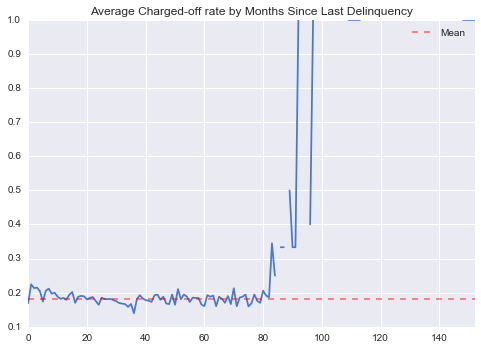

In [52]:
(df.loc[df['loan_status'] == 'Charged Off', 'mths_since_last_delinq']
     .value_counts()/df['mths_since_last_delinq'].value_counts()).plot(label = '')
plt.axhline(mean_charge_off, color = 'red', label = 'Mean', linestyle = 'dashed', alpha = 0.5)
plt.title('Average Charged-off rate by Months Since Last Delinquency')
plt.legend()

## Months Since Last Record

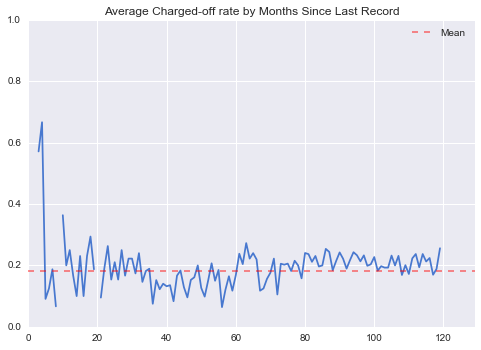

In [53]:
(df.loc[df['loan_status'] == 'Charged Off', 'mths_since_last_record']
     .value_counts()/df['mths_since_last_record'].value_counts()).plot(label = '')
plt.axhline(mean_charge_off, color = 'red', label = 'Mean', linestyle = 'dashed', alpha = 0.5)
plt.title('Average Charged-off rate by Months Since Last Record')
plt.legend()

In [54]:
df.loc[df['mths_since_last_record'] > 0, 'loan_status'].value_counts()

Fully Paid     10103
Charged Off     2516
Name: loan_status, dtype: int64

## Number of Open Accounts

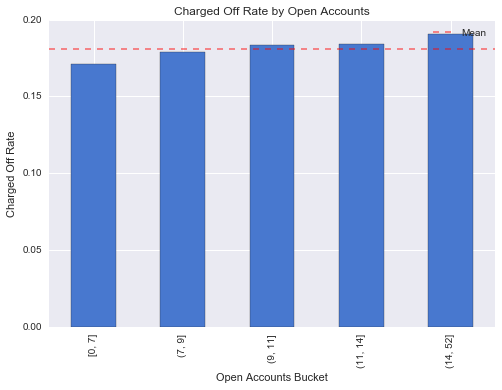

In [55]:
# Divide data into quantiles
labels = {
    'title': 'Charged Off Rate by Open Accounts',
    'xlabel': 'Open Accounts Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_qcut(df, 'open_acc', q = 5, labels = labels, legend_loc = 1)

## Public Records

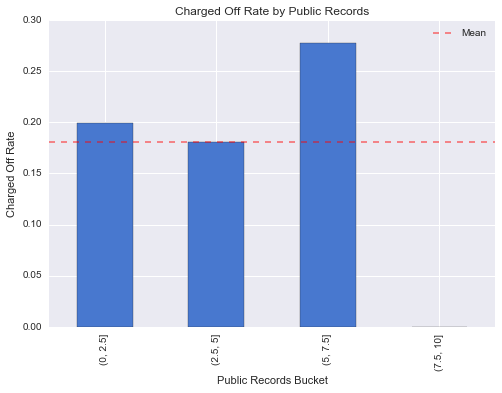

In [56]:
# Divide data into quantiles
seq = np.linspace(0,10,5)
# Divide data into quantiles
labels = {
    'title': 'Charged Off Rate by Public Records',
    'xlabel': 'Public Records Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_cut(df, 'pub_rec', bins = seq, labels = labels, legend_loc = 1)

## Revolving Balance and Utilization

In [57]:
(df.loc[(df['revol_bal'] > 0), 'loan_status']
    .value_counts()/df.loc[df['revol_bal'] >0].shape[0])

Fully Paid     0.819246
Charged Off    0.180754
Name: loan_status, dtype: float64

In [58]:
df['revol_util'] = pd.to_numeric(df['revol_util'].str.replace('%', ''), errors = 'coerce')/100

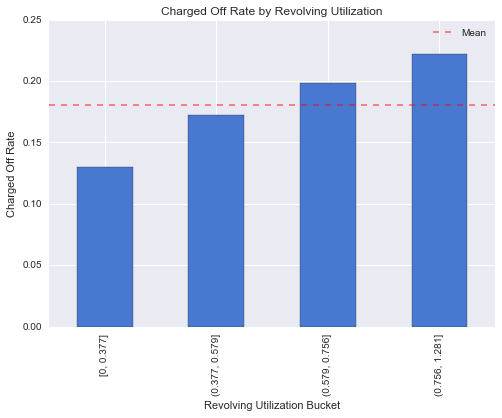

In [59]:
# Divide data into quantiles
labels = {
    'title': 'Charged Off Rate by Revolving Utilization',
    'xlabel': 'Revolving Utilization Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_qcut(df, 'revol_util', q = 4, labels = labels, legend_loc = 1)

## Total Accounts

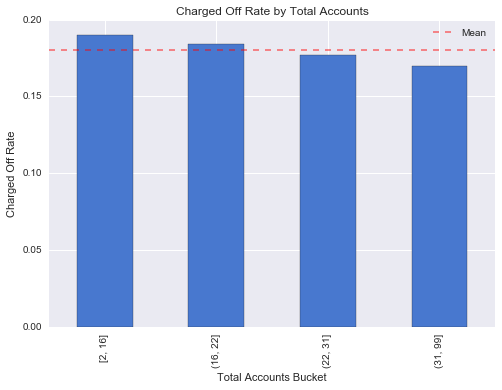

In [60]:
labels = {
    'title': 'Charged Off Rate by Total Accounts',
    'xlabel': 'Total Accounts Bucket',
    'ylabel': 'Charged Off Rate'
}
charge_off_plot_qcut(df, 'total_acc', q = 4, labels = labels, legend_loc = 1)

## Initial List Status

In [61]:
(df.loc[df['loan_status'] == 'Charged Off', 'initial_list_status']
    .value_counts()/df['initial_list_status'].value_counts())

f    0.179617
w    0.186476
Name: initial_list_status, dtype: float64

## Amount Outstanding

All observations have value zero.

## Total Payments

Not a good variable

## Accounts Delinquent

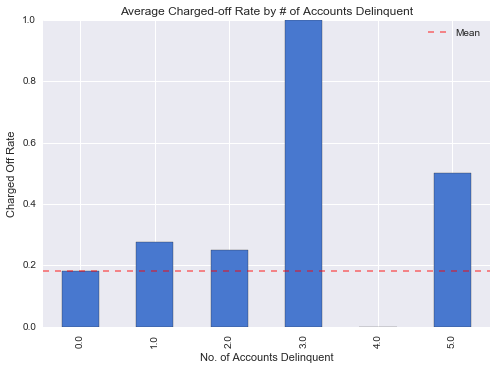

In [62]:
# Plot
(df.loc[df['loan_status'] == 'Charged Off', 'acc_now_delinq']
    .value_counts()/df['acc_now_delinq'].value_counts()).plot(kind = 'bar', label = '')

# Plot Settings
mean_charge_off = df.loc[df['loan_status'] == 'Charged Off', :].shape[0]/df.shape[0]
plt.title('Average Charged-off Rate by # of Accounts Delinquent')
plt.xlabel('No. of Accounts Delinquent')
plt.ylabel('Charged Off Rate')
plt.axhline(mean_charge_off, color = 'red', linestyle = 'dashed', alpha = 0.5, label = 'Mean')
plt.legend()

In [63]:
df.loc[df['acc_now_delinq'] == 4.0, 'loan_status']

173729    Fully Paid
Name: loan_status, dtype: object

# Modelling

## Prepare Data

In [118]:
df['expected_value'] = df['total_pymnt'] - df['funded_amnt']
expected_value = df.groupby(['loan_status', 'grade'], as_index = False)['loan_net_gain'].agg('mean')

In [119]:
df_bak = df.copy()

In [170]:
df = df_bak.copy()

### Drop Variables not used

In [171]:
X = df.copy()
ids = X['id']

drop_cols = [
    'out_prncp', 'out_prncp_inv',
    'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_d',
    'last_pymnt_amnt', 'last_credit_pull_d',
    'collections_12_mths_ex_med', 'mths_since_last_major_derog',
    'policy_code', 'application_type',
    'tot_coll_amt', 'tot_cur_bal',
    'total_rev_hi_lim', 'url',
    'title',  'issued_M',
    'earliest_cr_line_M', 'pymnt_plan',
    'issue_d', 'desc',
    'member_id', 'loan_net_gain',
    'emp_title', 'zip_code',
    'addr_state', 'earliest_cr_line',
    'mths_since_last_delinq', 'mths_since_last_record',
    'id'
]

X.drop(drop_cols, axis = 1, inplace = True)

### New Variables

In [172]:
# Loan Amount Squared
X['loan_amnt_2'] = X['loan_amnt']**2

# Inv Pct Squared
X['inv_pct_2'] = X['inv_pct']**2

# Inquiries in last 6 months
X['inq_last_6mths_2'] = X['inq_last_6mths']**2

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Prepare Data
y = X['loan_status'].values

# Fix data
X['revol_util'].fillna(X['revol_util'].mean(), inplace = True)
X.drop('loan_status', axis = 1, inplace = True)

# Get categorical values
X_dummy = pd.get_dummies(X.loc[:, X.dtypes == 'object'])

# New Indicator Variables
X['inv_pct_term_36 months'] = X['inv_pct']*X_dummy['term_ 36 months']
X['inv_pct_term_60 months'] = X['inv_pct']*X_dummy['term_ 60 months']
X['inv_pct_grade_A'] = X['inv_pct']*X_dummy['grade_A']
X['inv_pct_grade_B'] = X['inv_pct']*X_dummy['grade_B']
X['inv_pct_grade_C'] = X['inv_pct']*X_dummy['grade_C']
X['inv_pct_grade_D'] = X['inv_pct']*X_dummy['grade_D']
X['inv_pct_grade_E'] = X['inv_pct']*X_dummy['grade_E']
X['inv_pct_grade_F'] = X['inv_pct']*X_dummy['grade_F']
X['inv_pct_grade_G'] = X['inv_pct']*X_dummy['grade_G']
X['inv_pct_car'] = X['inv_pct']*X_dummy['purpose_car']
X['int_rate_credit_card'] = X['int_rate']*X_dummy['purpose_credit_card']
X['int_rate_debt_consolidation'] = X['int_rate']*X_dummy['purpose_debt_consolidation']
X['int_rate_educational'] = X['int_rate']*X_dummy['purpose_educational']
X['int_rate_home_improvement'] = X['int_rate']*X_dummy['purpose_home_improvement']
X['int_rate_house'] = X['int_rate']*X_dummy['purpose_house']
X['int_rate_major_purchase'] = X['int_rate']*X_dummy['purpose_major_purchase']
X['int_rate_medical'] = X['int_rate']*X_dummy['purpose_medical']
X['int_rate_moving'] = X['int_rate']*X_dummy['purpose_moving']
X['int_rate_other'] = X['int_rate']*X_dummy['purpose_other']
X['int_rate_renewable_energy'] = X['int_rate']*X_dummy['purpose_renewable_energy']
X['int_rate_small_business'] = X['int_rate']*X_dummy['purpose_small_business']
X['int_rate_vacation'] = X['int_rate']*X_dummy['purpose_vacation']
X['int_rate_wedding'] = X['int_rate']*X_dummy['purpose_wedding']

# Normalize numerical values normalized and obj values
X_num = X.loc[:, X.dtypes == 'float64'].values
X_num = StandardScaler().fit_transform(X_num)
X_dummy['id'] = ids

# Concatenate
X = np.concatenate((X_num, X_dummy), axis = 1)

# Apply PCA on X
# pca = PCA()
# pca.fit(X)

In [174]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_train = X_train[:, :-1]
X_test_id = X_test[:, -1]
X_test = X_test[:, :-1]

## Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, class_weight = 'balanced_subsample',
                             random_state = 2, oob_score = True, n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=2, verbose=0, warm_start=False)

In [176]:
class_proba = pd.DataFrame(rfc.predict_proba(X_test), columns = ['p_charge_off', 'p_fully_paid'])

In [177]:
from sklearn import metrics
metrics.f1_score(y_test, rfc.predict(X_test), pos_label = None, average = 'weighted')

0.75153826211443331

In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rfc.predict(X_test))

array([[  227,  5531],
       [  195, 25976]])

## Gradient Boosting

In [263]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 200)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [306]:
class_proba = pd.DataFrame(gbc.predict_proba(X_test), columns = ['p_charge_off', 'p_fully_paid'])

In [265]:
metrics.f1_score(y_test, gbc.predict(X_test), pos_label = None, average = 'weighted')

0.75473716079126918

In [266]:
confusion_matrix(y_test, gbc.predict(X_test))

array([[  283,  5475],
       [  230, 25941]])

## Logistic Regression

In [274]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1', class_weight = 'balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [293]:
class_proba = pd.DataFrame(lr.predict_proba(X_test), columns = ['p_charge_off', 'p_fully_paid'])

In [281]:
metrics.f1_score(y_test, lr.predict(X_test), pos_label = None, average = 'weighted')

0.69022303867231705

In [282]:
confusion_matrix(y_test, lr.predict(X_test))

array([[ 3755,  2003],
       [ 9140, 17031]])

## Results

In [185]:
expected_value.columns = ['loan_status', 'grade', 'expected_value']

In [242]:
ev = expected_value.pivot(index = 'grade', columns = 'loan_status', values = 'expected_value')
ev['grade'] = ev.index
ev.columns = ['ev_charge_off', 'ev_fully_paid', 'grade']

,ev_charge_off,ev_fully_paid,grade
grade,,,
A,-5038.606228,1111.199015,A
B,-5433.713176,1831.323922,B
C,-6219.544737,2525.133631,C
D,-6476.465297,3111.930414,D
E,-8518.431833,4947.876930,E
F,-9719.013612,6055.193394,F
G,-10667.896314,7436.526144,G


In [307]:
class_proba['id'] = X_test_id
cols = ['id', 'grade', 'loan_status', 'loan_net_gain']
results = df.loc[df['id'].isin(X_test_id), cols]

In [308]:
results = pd.merge(results, class_proba, on = 'id', how = 'left')
results = pd.merge(results, ev, on = ['grade'], how = 'left')

In [309]:
results['ev'] = results['p_fully_paid']*results['ev_fully_paid'] + results['p_charge_off']*results['ev_charge_off']
results['accept_loan'] = results['ev'].apply(lambda x: 1 if x >= 0 else 0)

In [310]:
results['binary_classification'] = gbc.predict(X_test)

In [312]:
# Simple method return
sum(results['loan_net_gain'])

20435491.418087736

In [313]:
# Expected value approach return
sum(results.loc[results['ev'] >= 0, 'loan_net_gain'])

25062007.990720704

In [314]:
# Highest probable class approach
sum(results.loc[results['binary_classification'] == 'Fully Paid', 'loan_net_gain'])

20260484.438131414

In [316]:
tp = results.loc[(results['loan_status'] == 'Charged Off')
                &(results['accept_loan'] == 0)].shape[0]

tn = results.loc[(results['loan_status'] == 'Fully Paid')
                &(results['accept_loan'] == 1)].shape[0]

fn = results.loc[(results['loan_status'] == 'Charged Off')
                &(results['accept_loan'] == 1)].shape[0]

fp = results.loc[(results['loan_status'] == 'Fully Paid')
                &(results['accept_loan'] == 0)].shape[0]

In [317]:
tp

1643

In [318]:
tn

23686

In [319]:
fn

4115

In [320]:
fp

2485